# ESTRATEGIA RATIOS

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 4__

__Gestión de Activos y Carteras__

__CUNEF__

Esta estrategia de optimización de carteras, o modelo de predicción de rendimientos a estudiar es la estrategia que compara los distintos ratios de una empresa.

Como explicamos en la preparación previa de los datos, los activos seleccionados son 59 activos pertenecientes a 4 índices distintos: Ibex 35, Euro Stoxx, Nasdaq y Dow Jones. Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo (la importancia de cada plazo depende del peso que le demos a cada una y será explicada más adelante). El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos los datos que hemos estudiado en el python anterior.

In [17]:
datos = pd.read_csv('activos_finales.csv')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,Sector,Country,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
Symbol,,,,,,,,,,,,,,,,,,,,,
FRE,FRESENIUS SE & CO KGAA,43.88,EUR,Healthcare-Services,GERMANY,0.165162,-0.063294,-0.076405,-0.341636,-0.116814,...,1.4237820242958328,5.038176807835165,-7.397260273972603,24.864534379182157,4.538462,26,20,0,0.000000,0.663
OR,L'OREAL,251.10,EUR,Cosmetics/Personal Care,FRANCE,0.032059,-0.006332,0.032484,0.108156,0.085859,...,4.763649494786657,22.586171168445816,-4.26784482758621,63.253283233333335,3.032258,31,7,7,0.000000,0
ASML,ASML HOLDING NV,295.60,EUR,Semiconductors,NETHERLANDS,0.108361,0.109818,0.734742,-0.046739,0.374452,...,10.045748564335948,39.42971046957317,0.9836065573770574,38.866863187131116,3.925000,40,23,4,0.000000,-0.10678147706595072
PHIA,KONINKLIJKE PHILIPS NV,42.04,EUR,Healthcare-Products,NETHERLANDS,0.057610,0.030771,0.163898,0.002897,0.114594,...,2.973449150377937,18.847019540996918,-7.205460569050113,63.85562575885329,4.115385,26,16,1,0.000000,0
SAN,SANOFI,87.67,EUR,Pharmaceuticals,FRANCE,-0.035958,-0.030628,0.166445,0.103085,-0.035195,...,1.8651870372882517,14.155552827660076,-32.843540793506655,135.86351047987617,4.433333,30,22,0,0.095604,0.432


In [18]:
datos.columns

Index(['Name', 'Price', 'Currency', 'Sector', 'Country', 'Rentab 1M',
       'Rentab 3M', 'Rentab 1Y', 'Rentab 2Y', 'Rentab 3Y', 'Rentab 5Y',
       'Volat 30d', 'Volat 360d', 'CUR_MKT_CAP', 'PE_RATIO',
       'PX_TO_BOOK_RATIO', 'PX_TO_CASH_FLOW', 'EPS_GROWTH', 'DVD_PAYOUT_RATIO',
       'EQY_REC_CONS', 'TOT_ANALYST_REC', 'TOT_BUY_REC', 'TOT_SELL_REC',
       'TWITTER_SENTIMENT_REALTIME', 'NEWS_SENTIMENT_RT'],
      dtype='object')

In [19]:
historicos = pd.read_csv('datos_historicos.csv')
historicos = historicos.set_index('Date')
historicos.pop('SAN.1')
historicos.pop('SAN.2')
historicos.pop('SAN.3')
historicos.head()

,FRE,OR,ASML,PHIA,SAN,BN,ORA,DTE,SU,AI,...,NKE,VZ,GS,KO,MMM,DIS,JPM,CAT,AXP,BA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,42.535000,137.399994,89.129997,24.174999,75.440002,53.860001,14.060,13.185,59.950001,89.786400,...,47.514999,46.959999,194.410004,42.139999,164.059998,93.750000,62.490002,91.879997,93.019997,129.949997
2015-01-05,42.410000,134.149994,87.489998,23.375000,73.269997,52.480000,13.520,12.780,57.340000,87.005997,...,46.750000,46.570000,188.339996,42.139999,160.360001,92.379997,60.549999,87.029999,90.559998,129.050003
2015-01-06,42.840000,134.149994,84.669998,23.155001,73.510002,52.320000,13.370,12.630,57.419998,86.279999,...,46.474998,47.040001,184.529999,42.459999,158.649994,91.889999,58.980000,86.470001,88.629997,127.529999
2015-01-07,42.544998,134.899994,84.949997,23.275000,74.290001,52.930000,13.590,12.990,57.779999,86.669601,...,47.435001,46.189999,187.279999,42.990002,159.800003,92.830002,59.070000,87.809998,90.300003,129.509995
2015-01-08,43.810001,139.800003,88.190002,23.865000,77.419998,54.459999,14.205,13.630,60.160000,90.317703,...,48.529999,47.180000,190.270004,43.509998,163.630005,93.790001,60.389999,88.709999,91.580002,131.800003


Seleccionamos las rentabilidades para crear el ranking y los pesos

In [20]:
cuenta = datos.Name.count()
ratios = datos[['PE_RATIO', 'PX_TO_BOOK_RATIO', 'PX_TO_CASH_FLOW', 'EPS_GROWTH', 'DVD_PAYOUT_RATIO']]
ratios.index = datos.index
ratios.head()

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
Symbol,,,,,
FRE,12.929288481977,1.4237820242958328,5.038176807835165,-7.397260273972603,24.864534379182157
OR,37.66153605421036,4.763649494786657,22.586171168445816,-4.26784482758621,63.253283233333335
ASML,47.2960009765625,10.045748564335948,39.42971046957317,0.9836065573770574,38.866863187131116
PHIA,31.94778992240832,2.973449150377937,18.847019540996918,-7.205460569050113,63.85562575885329
SAN,37.747855415827196,1.8651870372882517,14.155552827660076,-32.843540793506655,135.86351047987617


Este ranking será mejor cuanto menor sea el PE_RATIO, el PX_TO_BOOK_RATIO, PX_TO_CASH_FLOW y en el resto al contrario.

In [21]:
ranking = ratios.rank(ascending=False) 
ranking.head()

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
Symbol,,,,,
FRE,49.0,44.0,12.0,36.0,45.0
OR,16.0,11.0,23.0,42.0,13.0
ASML,9.0,35.0,14.0,32.0,31.0
PHIA,23.0,20.0,26.0,37.0,12.0
SAN,14.5,36.5,39.5,45.5,50.5


## Estrategia: mismo peso en corto que en largo

Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. En este caso, se selecciona aplicarle __el mismo peso al corto plazo que al largo__ pues aporta más rentabilidad (se ha seleccionado por prueba y error, estudiando los resultados finales de la estrategia) y es más estable que de forma opuesta, poniendole más peso al largo. Decidimos, además, apalancar esta estrategia (aplicando pesos de 200%) para obtener mejores resultados, pues de hacer lo contrario, con el tiempo, esta estrategia no sería tan óptima.

Una vez seleccionada nuestra estrategia, decidimos aplicarle una importancia de 50 y 50 a cada plazo (corto y largo respectivamente) para que tengan el mismo peso. 

In [22]:
corto = 50.0
largo = 50.0
peso_corto = -2
peso_largo = 2

In [23]:
lista = []
for i in ranking['PE_RATIO']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['PE_RATIO'])

In [24]:
lista2 = []
for i in ranking['PX_TO_BOOK_RATIO']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista2.extend(m)
    weights2 = pd.DataFrame(lista2, columns = ['PX_TO_BOOK_RATIO'])

In [25]:
lista3 = []
for i in ranking['PX_TO_CASH_FLOW']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista3.extend(m)
    weights3 = pd.DataFrame(lista3, columns = ['PX_TO_CASH_FLOW'])

In [26]:
lista4 = []
for i in ranking['EPS_GROWTH']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista4.extend(m)
    weights4 = pd.DataFrame(lista4, columns = ['EPS_GROWTH'])

In [27]:
lista5 = []
for i in ranking['DVD_PAYOUT_RATIO']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista5.extend(m)
    weights5 = pd.DataFrame(lista5, columns = ['DVD_PAYOUT_RATIO'])

Juntando los pesos de cada variable los cuales se han elegido estableciendo la misma importancia, obtenemos los pesos finales y añadimos una columna con el peso total de cada activo en base a su horizonte temporal.

In [36]:
weights['PX_TO_BOOK_RATIO'] = weights2['PX_TO_BOOK_RATIO']
weights['PX_TO_CASH_FLOW'] = weights3['PX_TO_CASH_FLOW']
weights['EPS_GROWTH'] = weights4['EPS_GROWTH']
weights['DVD_PAYOUT_RATIO'] = weights5['DVD_PAYOUT_RATIO']
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
Symbol,,,,,
FRE,0.04,0.04,0.04,0.04,0.04
OR,0.04,0.04,0.04,0.04,0.04
ASML,0.04,0.04,0.04,0.04,0.04
PHIA,0.04,0.04,0.04,0.04,0.04
SAN,0.04,0.04,0.04,0.04,-0.04


Horizonte temporal para modelos stat arb basado en rentabilidades pasadas

In [37]:
imp = [0.025, 0.025, 0.35, 0.25, 0.35]
sum(imp)

0.9999999999999999

In [38]:
weights['Total'] = (imp*weights).sum(axis=1)
weights.head()

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,Total
Symbol,,,,,,
FRE,0.04,0.04,0.04,0.04,0.04,0.040
OR,0.04,0.04,0.04,0.04,0.04,0.040
ASML,0.04,0.04,0.04,0.04,0.04,0.040
PHIA,0.04,0.04,0.04,0.04,0.04,0.040
SAN,0.04,0.04,0.04,0.04,-0.04,0.012


## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [41]:
df = historicos.pct_change().dropna()
df.head()

,FRE,OR,ASML,PHIA,SAN,BN,ORA,DTE,SU,AI,...,NKE,VZ,GS,KO,MMM,DIS,JPM,CAT,AXP,BA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.002939,-0.023654,-0.018400,-0.033092,-0.028765,-0.025622,-0.038407,-0.030717,-0.043536,-0.030967,...,-0.016100,-0.008305,-0.031223,0.000000,-0.022553,-0.014613,-0.031045,-0.052786,-0.026446,-0.006926
2015-01-06,0.010139,0.000000,-0.032232,-0.009412,0.003276,-0.003049,-0.011095,-0.011737,0.001395,-0.008344,...,-0.005882,0.010092,-0.020229,0.007594,-0.010664,-0.005304,-0.025929,-0.006435,-0.021312,-0.011778
2015-01-07,-0.006886,0.005591,0.003307,0.005182,0.010611,0.011659,0.016455,0.028504,0.006270,0.004516,...,0.020656,-0.018070,0.014903,0.012482,0.007249,0.010230,0.001526,0.015497,0.018842,0.015526
2015-01-08,0.029733,0.036323,0.038140,0.025349,0.042132,0.028906,0.045254,0.049269,0.041191,0.042092,...,0.023084,0.021433,0.015965,0.012096,0.023967,0.010341,0.022346,0.010249,0.014175,0.017682
2015-01-09,-0.005821,-0.014306,-0.026647,-0.028284,-0.032808,-0.022769,-0.016543,-0.026412,-0.022606,-0.022451,...,-0.011024,-0.008902,-0.015347,-0.011032,-0.012284,0.004905,-0.017387,-0.011949,-0.012667,-0.001973


In [42]:
def ratios(ratios, weights):
    '''
        returns = dataframe que contiene los ratios diarios de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(ratios)):
        
        value = resultados[i-1] * (1 + (ratios.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['ratios'])  
    final.set_index(ratios.index, inplace=True)
        
    return final

In [43]:
final = ratios(df, weights)
final

,ratios
Date,
2015-01-05,100.000000
2015-01-06,99.400045
2015-01-07,100.795088
2015-01-08,105.208099
2015-01-09,103.158718
...,...
2019-12-25,209.537215
2019-12-26,210.140355
2019-12-27,211.185431


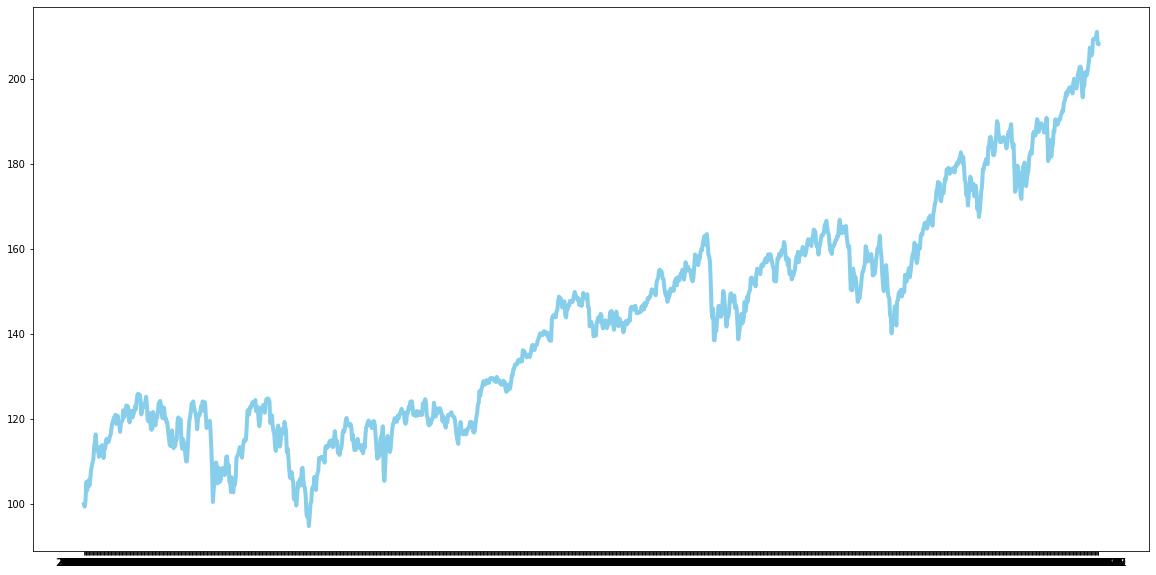

In [45]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['ratios'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='ratios')

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el mayor peso al largo que al corto plazo o viceversa, los resultados eran peores y la subida era mucho menos estable, es decir, que había más volatilidad).

In [46]:
final.to_csv('Estrategia_ratios.csv')